# Step 1. Import Libraries and Dataset


In [1]:
import pandas as pd
import numpy as np
import warnings
from pandas_profiling import ProfileReport
from collections import Counter
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
dataset = pd.read_csv('/content/drive/MyDrive/diabetes_012_health_indicators_BRFSS2015.csv')

# Step 2: Descriptive Statistics

In [4]:
# Preview data
dataset.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Dataset dimensions - (rows, columns)
dataset.shape

(253680, 22)

In [61]:
dataset1 = dataset[:1000]
dataset1.shape

(1000, 22)

In [62]:
#dataset1 = dataset[['Diabetes_012','Age', 'HighBP','HighChol','MentHlth','PhysHlth','GenHlth','BMI','Smoker','Sex']]

In [63]:
#dataset1.info()

In [64]:
#dataset1.shape

In [65]:
#dataset1.describe().T

In [66]:
# Features data-type
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Diabetes_012          1000 non-null   int64   
 1   HighBP                1000 non-null   category
 2   HighChol              1000 non-null   category
 3   CholCheck             1000 non-null   category
 4   BMI                   1000 non-null   float64 
 5   Smoker                1000 non-null   category
 6   Stroke                1000 non-null   category
 7   HeartDiseaseorAttack  1000 non-null   category
 8   PhysActivity          1000 non-null   category
 9   Fruits                1000 non-null   category
 10  Veggies               1000 non-null   category
 11  HvyAlcoholConsump     1000 non-null   category
 12  AnyHealthcare         1000 non-null   float64 
 13  NoDocbcCost           1000 non-null   category
 14  GenHlth               1000 non-null   category
 15  MentH

In [71]:
# Statistical summary
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,1000.0,0.242000,0.428509,0.0,0.000000,0.00000,0.000000,1.0
BMI,1000.0,0.307372,0.144607,0.0,0.209302,0.27907,0.372093,1.0
AnyHealthcare,1000.0,0.958000,0.200690,0.0,1.000000,1.00000,1.000000,1.0
MentHlth,1000.0,0.137433,0.279750,0.0,0.000000,0.00000,0.100000,1.0
PhysHlth,1000.0,0.192200,0.330971,0.0,0.000000,0.00000,0.233333,1.0


In [35]:
# Count of null values
dataset1.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
#dataset1.isnull().sum()

# Step 2: Data Visualization

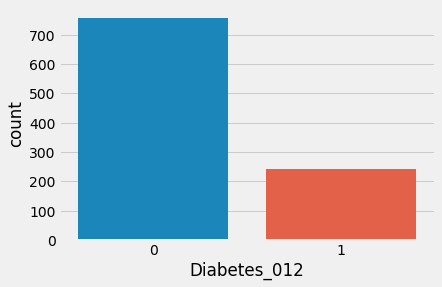

In [81]:
# Outcome countplot
sns.countplot(x = 'Diabetes_012',data = dataset1)

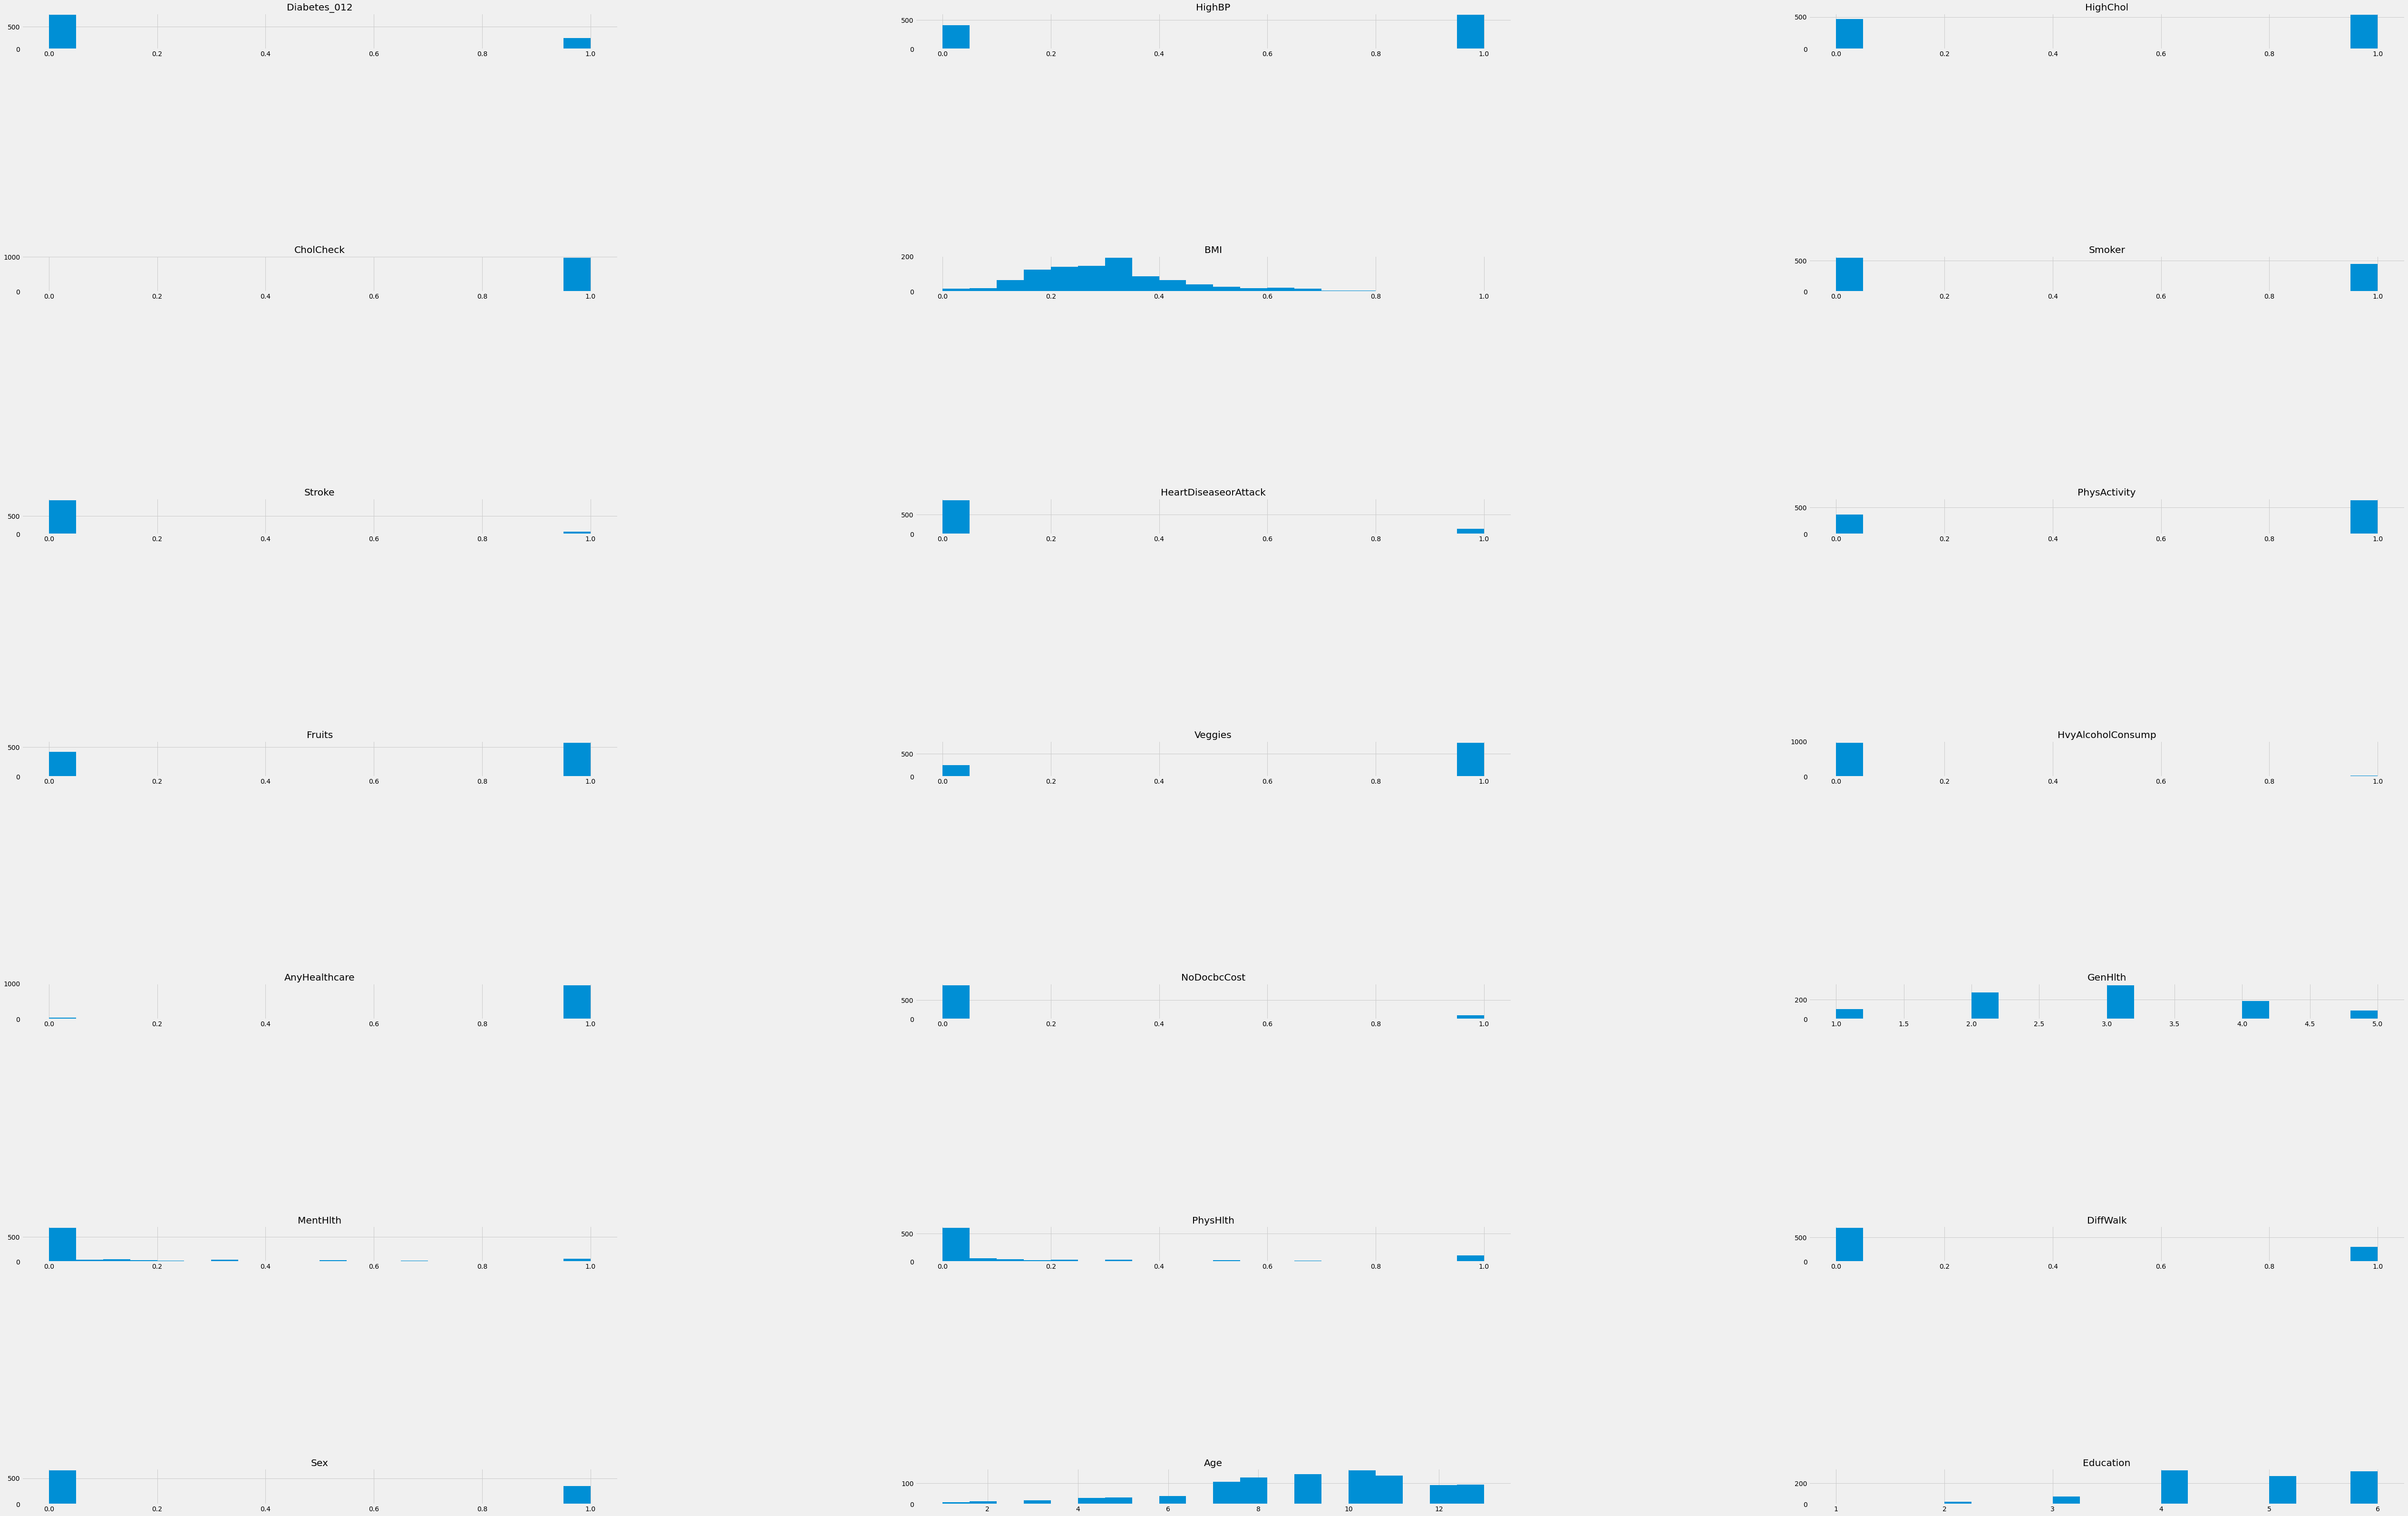

In [113]:
# Histogram of each feature
import itertools

col = dataset1.columns[:21]
plt.subplots(figsize = (80, 80))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.5,hspace = 5.8)
    dataset1[i].hist(bins = 20)
    plt.title(i)
plt.show()

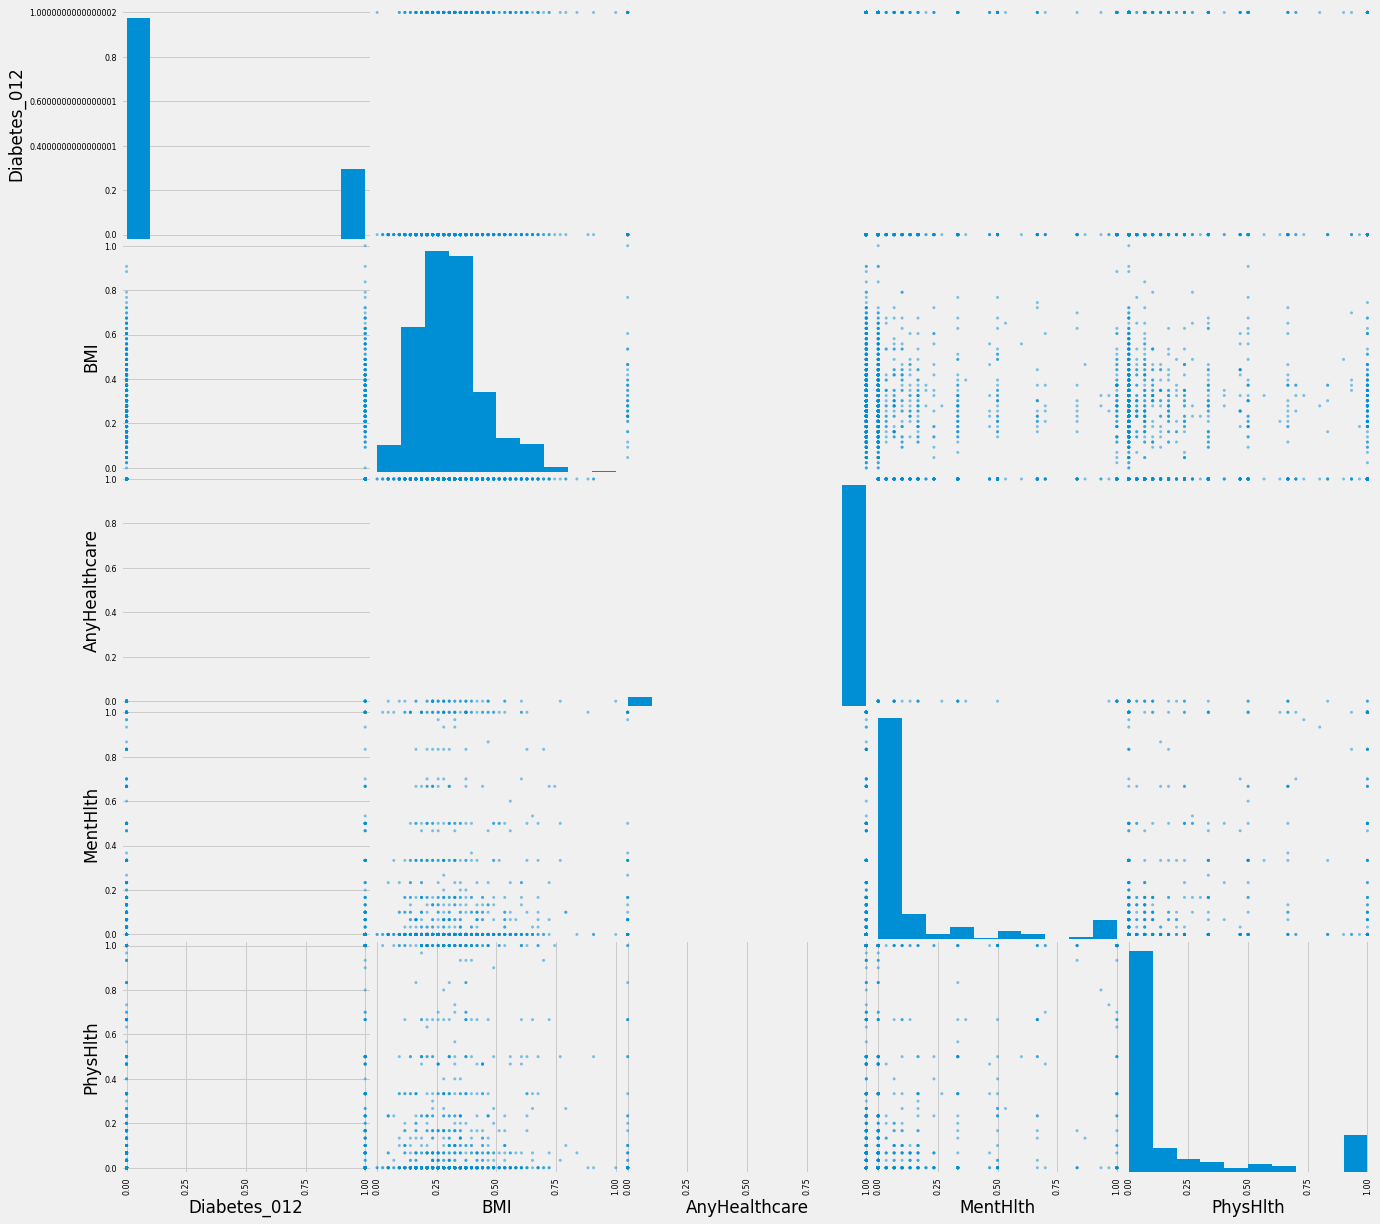

In [114]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset1, figsize = (20, 20));

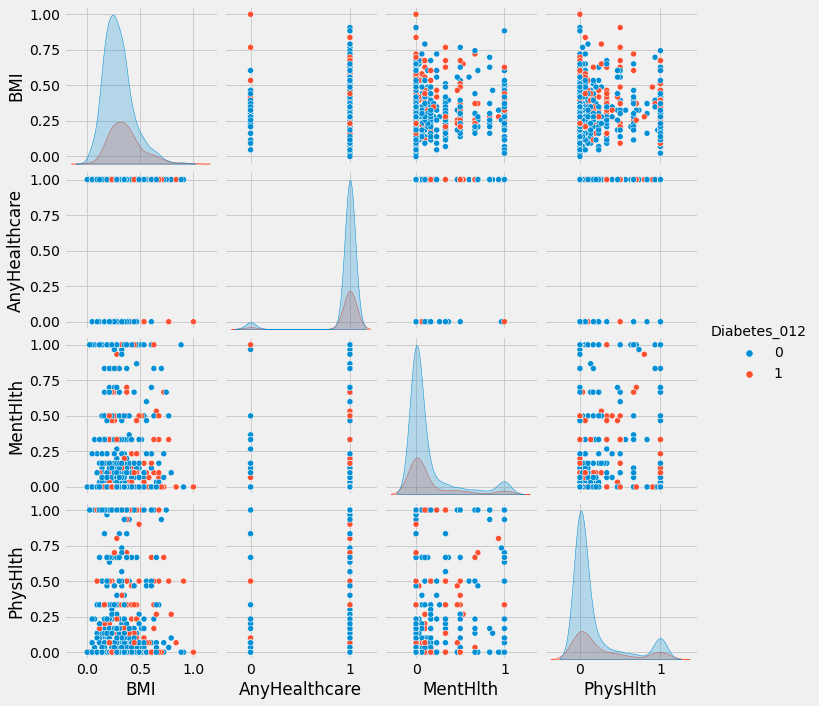

In [117]:
# Pairplot 
sns.pairplot(data = dataset1, hue = 'Diabetes_012')
plt.show()

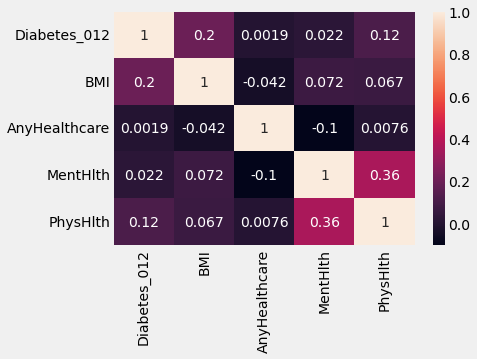

In [118]:
# Heatmap
sns.heatmap(dataset1.corr(), annot = True)
plt.show()

# Step 3: Data Preprocessing

In [167]:
df = dataset1

In [168]:
#Data pre-processing
num_attribs = ['BMI', 'MentHlth', 'PhysHlth']

cat_attribs = list(df.columns[~df.columns.isin(['BMI', 'MentHlth', 'AnyHealthcare',
                                                'PhysHlth', 'Diabetes_012'])])

df[cat_attribs] = df[cat_attribs].astype('category')
df.Diabetes_012 = df.Diabetes_012.astype('int')

#Normalize continuous variables
for num in num_attribs: 
    df[num] = (df[num] - df[num].min()) / (df[num].max() - df[num].min()) 

label_map = {0:0, 1:1, 2:1}

df['Diabetes_012'] = df['Diabetes_012'].map(label_map)

y = df.Diabetes_012

attribs = df[num_attribs + cat_attribs]

X = pd.get_dummies(attribs, drop_first=True)

#Data Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=33)

eval_set = [(X_val, y_val)]

# summarize the class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({0: 606, 1: 194})


In [169]:
# transform the training dataset
oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution of the training dataset
counter = Counter(y_train)
print(counter)

Counter({1: 606, 0: 606})


In [170]:
#X = df.drop('Diabetes_012', axis =1).values
#y = df.Diabetes_012.values
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [171]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", y_train.shape)
print("Y_val shape:", y_val.shape)

X_train shape: (1212, 44)
X_val shape: (200, 44)
Y_train shape: (1212,)
Y_val shape: (200,)


In [172]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [173]:
Y_pred_logreg = logreg.predict(X_val)

In [174]:
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_val, Y_pred_logreg)
print("Logistic Regression: " + str(accuracy_logreg * 100))

Logistic Regression: 76.0


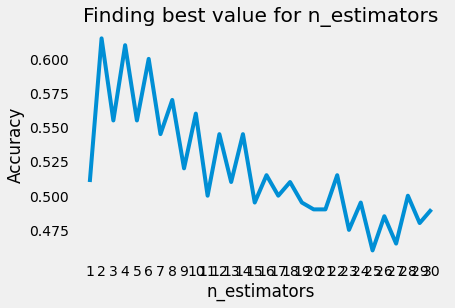

Highest value:  0.615


In [175]:
# Plotting a graph for n_neighbors 
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_val)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, y_val)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [176]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [177]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [178]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [179]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [180]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [181]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_val)
Y_pred_knn = knn.predict(X_val)
Y_pred_svc = svc.predict(X_val)
Y_pred_nb = nb.predict(X_val)
Y_pred_dectree = dectree.predict(X_val)
Y_pred_ranfor = ranfor.predict(X_val)

# Step 5: Model Evaluation

In [182]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_val, Y_pred_logreg)
accuracy_knn = accuracy_score(y_val, Y_pred_knn)
accuracy_svc = accuracy_score(y_val, Y_pred_svc)
accuracy_nb = accuracy_score(y_val, Y_pred_nb)
accuracy_dectree = accuracy_score(y_val, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_val, Y_pred_ranfor)

In [183]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 76.0
K Nearest neighbors: 51.0
Support Vector Classifier: 77.0
Naive Bayes: 41.5
Decision tree: 65.0
Random Forest: 67.5


In [184]:
#From the above comparison, we can observe that Logistic Regression gets the highest accuracy of 77.00 %

In [185]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, Y_pred_svc)
cm

array([[145,   7],
       [ 39,   9]])

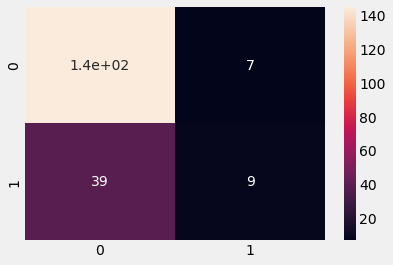

In [186]:
# Heatmap of Confusion matrix
import seaborn as sns
sns.heatmap(pd.DataFrame(cm), annot=True)

In [187]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, Y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       152
           1       0.56      0.19      0.28        48

    accuracy                           0.77       200
   macro avg       0.68      0.57      0.57       200
weighted avg       0.73      0.77      0.72       200



# **Neural Network**

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [153]:
X = df.drop('Diabetes_012', axis =1).values
y = df.Diabetes_012.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [154]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [155]:
model = nn()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 21)]              0         
                                                                 
 FC1 (Dense)                 (None, 128)               2816      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512 

In [156]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [157]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [165]:
model.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_dev, y_dev), verbose=0)

In [166]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))

Training set:
	Accuracy:0.864
	Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       601
           1       0.80      0.60      0.69       199

    accuracy                           0.86       800
   macro avg       0.84      0.77      0.80       800
weighted avg       0.86      0.86      0.86       800

Dev set:
	Accuracy:0.740
	Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        83
           1       0.24      0.24      0.24        17

    accuracy                           0.74       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.74      0.74      0.74       100

Test set:
	Accuracy:0.680
	Classification Report
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        74
           1       0.35      0.27      0.30        26

    accuracy                    